# Splitting Data

In [1]:
import pandas as pd
import math as ma
from pathlib import Path

In [2]:
path_1 = Path(r'C:\Users\stoic\Desktop\money\coding\2. Crypto\Backtesting\zzzzz Remaking Data')
df = pd.read_csv(path_1.joinpath("BTC_4H_OHLC_UTC.csv"))
df

,Timestamp,Open,High,Low,Close,Volume
0,2015-01-01 00:00:00,321.00,321.00,317.50,318.39,337.136393
1,2015-01-01 04:00:00,318.39,318.39,312.60,315.70,1148.301276
2,2015-01-01 08:00:00,315.70,318.25,314.34,315.57,1052.572365
3,2015-01-01 12:00:00,315.57,317.37,313.24,313.24,715.128419
4,2015-01-01 16:00:00,315.35,315.95,313.24,315.40,1031.987261
...,...,...,...,...,...,...
17496,2023-01-02 00:00:00,16617.17,16707.25,16548.70,16661.94,19463.475100
17497,2023-01-02 04:00:00,16662.38,16769.51,16619.44,16721.28,26026.881780
17498,2023-01-02 08:00:00,16721.27,16772.01,16704.07,16735.11,23267.941190
17499,2023-01-02 12:00:00,16735.51,16750.00,16669.15,16734.66,21747.214910


In [3]:
data_start = df.Timestamp.iloc[0]
data_start

'2015-01-01 00:00:00'

In [4]:
data_end = df.Timestamp.iloc[-1]
data_end

'2023-01-02 16:00:00'

# Optimizing

In [5]:
#Make the EMA just trade long signals, so no shorting
from IterativeOPTfilterEMAmacdproEXTRAtpslDiff import *

In [6]:
#Here I am defining the parameters that I need to pass when I call the function
symbol = "Close"
EMA_S = 12
EMA_L = 26
signal_mw = 9
EMA_Trend = 20
EMA_Trend_Two = 270
stop_loss = 15
take_profit = 15
start = data_start
end = data_end
amount = 3000
leverage = "100%"
fee = 0.001

In [7]:
optimizer = IterativeBacktest(symbol, start, end, amount, EMA_S, EMA_L, signal_mw, EMA_Trend, EMA_Trend_Two, stop_loss, take_profit, leverage, fee)

In [8]:
optimizer.data

,Open,High,Low,Close,Volume,returns,MACD,MACD_Signal,macdhist,EMA_Trend
Timestamp,,,,,,,,,,
2015-01-01 00:00:00,321.00,321.00,317.50,318.39,337.136393,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:00:00,318.39,318.39,312.60,315.70,1148.301276,-0.008485,NaN,NaN,NaN,NaN
2015-01-01 08:00:00,315.70,318.25,314.34,315.57,1052.572365,-0.000412,NaN,NaN,NaN,NaN
2015-01-01 12:00:00,315.57,317.37,313.24,313.24,715.128419,-0.007411,NaN,NaN,NaN,NaN
2015-01-01 16:00:00,315.35,315.95,313.24,315.40,1031.987261,0.006872,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-01-02 00:00:00,16617.17,16707.25,16548.70,16661.94,19463.475100,0.002716,-13.269206,-31.390804,18.121598,16589.481292
2023-01-02 04:00:00,16662.38,16769.51,16619.44,16721.28,26026.881780,0.003555,-1.535058,-25.419655,23.884596,16602.033549
2023-01-02 08:00:00,16721.27,16772.01,16704.07,16735.11,23267.941190,0.000827,8.779103,-18.579903,27.359006,16614.707497


In [9]:
stop_loss_range = (1, 31, 1)
take_profit_range = (1, 51, 1)

In [10]:
optimizer.optimize_parameters(stop_loss_range, take_profit_range)

---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.01%, take_profit = 0.01%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 1240.12
2023-01-02 00:00:00 | net performance (%) = -58.66
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.01%, take_profit = 0.02%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Curr

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 20812.79
2023-01-02 00:00:00 | net performance (%) = 593.76
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.01%, take_profit = 0.17%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 22959.61
2023-01-02 00:00:00 | net performance (%) = 665.32
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_los

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 20066.71
2023-01-02 00:00:00 | net performance (%) = 568.89
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.01%, take_profit = 0.32%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 20219.89
2023-01-02 00:00:00 | net performance (%) = 574.0
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 17284.07
2023-01-02 00:00:00 | net performance (%) = 476.14
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.01%, take_profit = 0.47%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 17284.07
2023-01-02 00:00:00 | net performance (%) = 476.14
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_los

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 24881.94
2023-01-02 00:00:00 | net performance (%) = 729.4
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.02%, take_profit = 0.12%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 24383.03
2023-01-02 00:00:00 | net performance (%) = 712.77
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 47881.81
2023-01-02 00:00:00 | net performance (%) = 1496.06
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.02%, take_profit = 0.27%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 46639.64
2023-01-02 00:00:00 | net performance (%) = 1454.65
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 41831.89
2023-01-02 00:00:00 | net performance (%) = 1294.4
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.02%, take_profit = 0.42%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 42128.57
2023-01-02 00:00:00 | net performance (%) = 1304.29
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_lo

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 12409.9
2023-01-02 00:00:00 | net performance (%) = 313.66
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.03%, take_profit = 0.07%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 15879.16
2023-01-02 00:00:00 | net performance (%) = 429.31
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 69445.85
2023-01-02 00:00:00 | net performance (%) = 2214.86
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.03%, take_profit = 0.22%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 76654.89
2023-01-02 00:00:00 | net performance (%) = 2455.16
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 59259.36
2023-01-02 00:00:00 | net performance (%) = 1875.31
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.03%, take_profit = 0.37%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 55404.38
2023-01-02 00:00:00 | net performance (%) = 1746.81
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 2705.31
2023-01-02 00:00:00 | net performance (%) = -9.82
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.04%, take_profit = 0.02%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 4222.39
2023-01-02 00:00:00 | net performance (%) = 40.75
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 82806.04
2023-01-02 00:00:00 | net performance (%) = 2660.2
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.04%, take_profit = 0.17%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 98684.1
2023-01-02 00:00:00 | net performance (%) = 3189.47
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_los

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 94819.13
2023-01-02 00:00:00 | net performance (%) = 3060.64
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.04%, take_profit = 0.32%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 97007.18
2023-01-02 00:00:00 | net performance (%) = 3133.57
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 87704.23
2023-01-02 00:00:00 | net performance (%) = 2823.47
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.04%, take_profit = 0.47%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 88304.94
2023-01-02 00:00:00 | net performance (%) = 2843.5
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_lo

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 74364.16
2023-01-02 00:00:00 | net performance (%) = 2378.81
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.05%, take_profit = 0.12%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 78032.12
2023-01-02 00:00:00 | net performance (%) = 2501.07
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 159272.71
2023-01-02 00:00:00 | net performance (%) = 5209.09
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.05%, take_profit = 0.27%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 156372.08
2023-01-02 00:00:00 | net performance (%) = 5112.4
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 155713.71
2023-01-02 00:00:00 | net performance (%) = 5090.46
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.05%, take_profit = 0.42%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 157930.25
2023-01-02 00:00:00 | net performance (%) = 5164.34
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 28354.91
2023-01-02 00:00:00 | net performance (%) = 845.16
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.06%, take_profit = 0.07%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 39537.0
2023-01-02 00:00:00 | net performance (%) = 1217.9
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 191087.39
2023-01-02 00:00:00 | net performance (%) = 6269.58
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.06%, take_profit = 0.22%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 214424.54
2023-01-02 00:00:00 | net performance (%) = 7047.48
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 176570.01
2023-01-02 00:00:00 | net performance (%) = 5785.67
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.06%, take_profit = 0.37%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 166297.52
2023-01-02 00:00:00 | net performance (%) = 5443.25
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 3607.41
2023-01-02 00:00:00 | net performance (%) = 20.25
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.07%, take_profit = 0.02%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 6473.37
2023-01-02 00:00:00 | net performance (%) = 115.78
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss =

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 185499.57
2023-01-02 00:00:00 | net performance (%) = 6083.32
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.07%, take_profit = 0.17%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 224897.07
2023-01-02 00:00:00 | net performance (%) = 7396.57
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 220817.0
2023-01-02 00:00:00 | net performance (%) = 7260.57
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.07%, take_profit = 0.32%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 227637.11
2023-01-02 00:00:00 | net performance (%) = 7487.9
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 212846.06
2023-01-02 00:00:00 | net performance (%) = 6994.87
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.07%, take_profit = 0.47%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 214303.91
2023-01-02 00:00:00 | net performance (%) = 7043.46
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 107791.47
2023-01-02 00:00:00 | net performance (%) = 3493.05
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.08%, take_profit = 0.12%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 110270.48
2023-01-02 00:00:00 | net performance (%) = 3575.68
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 249068.66
2023-01-02 00:00:00 | net performance (%) = 8202.29
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.08%, take_profit = 0.27%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 246473.42
2023-01-02 00:00:00 | net performance (%) = 8115.78
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 206364.21
2023-01-02 00:00:00 | net performance (%) = 6778.81
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.08%, take_profit = 0.42%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 209301.74
2023-01-02 00:00:00 | net performance (%) = 6876.72
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 34941.46
2023-01-02 00:00:00 | net performance (%) = 1064.72
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.09%, take_profit = 0.07%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 50112.98
2023-01-02 00:00:00 | net performance (%) = 1570.43
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 320877.12
2023-01-02 00:00:00 | net performance (%) = 10595.9
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.09%, take_profit = 0.22%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 366041.33
2023-01-02 00:00:00 | net performance (%) = 12101.38
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 254849.34
2023-01-02 00:00:00 | net performance (%) = 8394.98
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.09%, take_profit = 0.37%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 240022.7
2023-01-02 00:00:00 | net performance (%) = 7900.76
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 3615.38
2023-01-02 00:00:00 | net performance (%) = 20.51
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.1%, take_profit = 0.02%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 6297.81
2023-01-02 00:00:00 | net performance (%) = 109.93
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 231305.72
2023-01-02 00:00:00 | net performance (%) = 7610.19
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.1%, take_profit = 0.17%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 282849.31
2023-01-02 00:00:00 | net performance (%) = 9328.31
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 279735.91
2023-01-02 00:00:00 | net performance (%) = 9224.53
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.1%, take_profit = 0.32%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 288375.77
2023-01-02 00:00:00 | net performance (%) = 9512.53
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 269638.14
2023-01-02 00:00:00 | net performance (%) = 8887.94
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.1%, take_profit = 0.47%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 271484.97
2023-01-02 00:00:00 | net performance (%) = 8949.5
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 143838.32
2023-01-02 00:00:00 | net performance (%) = 4694.61
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.11%, take_profit = 0.12%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 148471.99
2023-01-02 00:00:00 | net performance (%) = 4849.07
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 352871.48
2023-01-02 00:00:00 | net performance (%) = 11662.38
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.11%, take_profit = 0.27%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 349194.64
2023-01-02 00:00:00 | net performance (%) = 11539.82
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 292369.36
2023-01-02 00:00:00 | net performance (%) = 9645.65
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.11%, take_profit = 0.42%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 296531.15
2023-01-02 00:00:00 | net performance (%) = 9784.37
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 40622.58
2023-01-02 00:00:00 | net performance (%) = 1254.09
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.12%, take_profit = 0.07%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 58260.83
2023-01-02 00:00:00 | net performance (%) = 1842.03
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 360750.16
2023-01-02 00:00:00 | net performance (%) = 11925.01
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.12%, take_profit = 0.22%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 411526.58
2023-01-02 00:00:00 | net performance (%) = 13617.55
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 286517.58
2023-01-02 00:00:00 | net performance (%) = 9450.59
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.12%, take_profit = 0.37%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 269848.55
2023-01-02 00:00:00 | net performance (%) = 8894.95
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 3615.38
2023-01-02 00:00:00 | net performance (%) = 20.51
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.13%, take_profit = 0.02%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 7000.67
2023-01-02 00:00:00 | net performance (%) = 133.36
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss =

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 240264.65
2023-01-02 00:00:00 | net performance (%) = 7908.82
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.13%, take_profit = 0.17%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 293804.63
2023-01-02 00:00:00 | net performance (%) = 9693.49
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 290570.64
2023-01-02 00:00:00 | net performance (%) = 9585.69
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.13%, take_profit = 0.32%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 299545.13
2023-01-02 00:00:00 | net performance (%) = 9884.84
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 280081.76
2023-01-02 00:00:00 | net performance (%) = 9236.06
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.13%, take_profit = 0.47%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 282000.12
2023-01-02 00:00:00 | net performance (%) = 9300.0
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 134304.79
2023-01-02 00:00:00 | net performance (%) = 4376.83
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.14%, take_profit = 0.12%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 138631.34
2023-01-02 00:00:00 | net performance (%) = 4521.04
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 329483.33
2023-01-02 00:00:00 | net performance (%) = 10882.78
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.14%, take_profit = 0.27%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 326050.19
2023-01-02 00:00:00 | net performance (%) = 10768.34
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 272991.26
2023-01-02 00:00:00 | net performance (%) = 8999.71
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.14%, take_profit = 0.42%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 276877.21
2023-01-02 00:00:00 | net performance (%) = 9129.24
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 39237.72
2023-01-02 00:00:00 | net performance (%) = 1207.92
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.15%, take_profit = 0.07%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 56274.67
2023-01-02 00:00:00 | net performance (%) = 1775.82
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 379750.48
2023-01-02 00:00:00 | net performance (%) = 12558.35
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.15%, take_profit = 0.22%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 433201.25
2023-01-02 00:00:00 | net performance (%) = 14340.04
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 301608.16
2023-01-02 00:00:00 | net performance (%) = 9953.61
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.15%, take_profit = 0.37%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 284061.19
2023-01-02 00:00:00 | net performance (%) = 9368.71
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 3615.38
2023-01-02 00:00:00 | net performance (%) = 20.51
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.16%, take_profit = 0.02%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 7000.67
2023-01-02 00:00:00 | net performance (%) = 133.36
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss =

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 255722.46
2023-01-02 00:00:00 | net performance (%) = 8424.08
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.16%, take_profit = 0.17%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 312707.02
2023-01-02 00:00:00 | net performance (%) = 10323.57
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 309264.97
2023-01-02 00:00:00 | net performance (%) = 10208.83
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.16%, take_profit = 0.32%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 318816.85
2023-01-02 00:00:00 | net performance (%) = 10527.23
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 298101.27
2023-01-02 00:00:00 | net performance (%) = 9836.71
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.16%, take_profit = 0.47%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 300143.06
2023-01-02 00:00:00 | net performance (%) = 9904.77
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 144547.61
2023-01-02 00:00:00 | net performance (%) = 4718.25
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.17%, take_profit = 0.12%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 149204.13
2023-01-02 00:00:00 | net performance (%) = 4873.47
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 354611.54
2023-01-02 00:00:00 | net performance (%) = 11720.38
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.17%, take_profit = 0.27%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 350916.57
2023-01-02 00:00:00 | net performance (%) = 11597.22
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 293811.07
2023-01-02 00:00:00 | net performance (%) = 9693.7
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.17%, take_profit = 0.42%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 297993.38
2023-01-02 00:00:00 | net performance (%) = 9833.11
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 41612.61
2023-01-02 00:00:00 | net performance (%) = 1287.09
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.18%, take_profit = 0.07%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 59680.73
2023-01-02 00:00:00 | net performance (%) = 1889.36
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 402735.09
2023-01-02 00:00:00 | net performance (%) = 13324.5
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.18%, take_profit = 0.22%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 459420.99
2023-01-02 00:00:00 | net performance (%) = 15214.03
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 319863.16
2023-01-02 00:00:00 | net performance (%) = 10562.11
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.18%, take_profit = 0.37%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 301254.15
2023-01-02 00:00:00 | net performance (%) = 9941.8
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 3615.38
2023-01-02 00:00:00 | net performance (%) = 20.51
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.19%, take_profit = 0.02%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 7000.67
2023-01-02 00:00:00 | net performance (%) = 133.36
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss =

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 274428.78
2023-01-02 00:00:00 | net performance (%) = 9047.63
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.19%, take_profit = 0.17%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 335581.81
2023-01-02 00:00:00 | net performance (%) = 11086.06
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 331887.97
2023-01-02 00:00:00 | net performance (%) = 10962.93
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.19%, take_profit = 0.32%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 342138.58
2023-01-02 00:00:00 | net performance (%) = 11304.62
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 319907.63
2023-01-02 00:00:00 | net performance (%) = 10563.59
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.19%, take_profit = 0.47%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 322098.78
2023-01-02 00:00:00 | net performance (%) = 10636.63
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 156990.32
2023-01-02 00:00:00 | net performance (%) = 5133.01
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.2%, take_profit = 0.12%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 162047.68
2023-01-02 00:00:00 | net performance (%) = 5301.59
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 385136.64
2023-01-02 00:00:00 | net performance (%) = 12737.89
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.2%, take_profit = 0.27%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 381123.6
2023-01-02 00:00:00 | net performance (%) = 12604.12
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 319102.44
2023-01-02 00:00:00 | net performance (%) = 10536.75
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.2%, take_profit = 0.42%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 323644.77
2023-01-02 00:00:00 | net performance (%) = 10688.16
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 41612.61
2023-01-02 00:00:00 | net performance (%) = 1287.09
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.21%, take_profit = 0.07%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 59680.73
2023-01-02 00:00:00 | net performance (%) = 1889.36
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 402735.09
2023-01-02 00:00:00 | net performance (%) = 13324.5
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.21%, take_profit = 0.22%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 459420.99
2023-01-02 00:00:00 | net performance (%) = 15214.03
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 319863.16
2023-01-02 00:00:00 | net performance (%) = 10562.11
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.21%, take_profit = 0.37%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 301254.15
2023-01-02 00:00:00 | net performance (%) = 9941.8
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 3615.38
2023-01-02 00:00:00 | net performance (%) = 20.51
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.22%, take_profit = 0.02%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 7000.67
2023-01-02 00:00:00 | net performance (%) = 133.36
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss =

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 274428.78
2023-01-02 00:00:00 | net performance (%) = 9047.63
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.22%, take_profit = 0.17%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 335581.81
2023-01-02 00:00:00 | net performance (%) = 11086.06
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 331887.97
2023-01-02 00:00:00 | net performance (%) = 10962.93
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.22%, take_profit = 0.32%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 342138.58
2023-01-02 00:00:00 | net performance (%) = 11304.62
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 319907.63
2023-01-02 00:00:00 | net performance (%) = 10563.59
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.22%, take_profit = 0.47%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 322098.78
2023-01-02 00:00:00 | net performance (%) = 10636.63
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 156990.32
2023-01-02 00:00:00 | net performance (%) = 5133.01
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.23%, take_profit = 0.12%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 162047.68
2023-01-02 00:00:00 | net performance (%) = 5301.59
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 385136.64
2023-01-02 00:00:00 | net performance (%) = 12737.89
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.23%, take_profit = 0.27%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 381123.6
2023-01-02 00:00:00 | net performance (%) = 12604.12
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 319102.44
2023-01-02 00:00:00 | net performance (%) = 10536.75
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.23%, take_profit = 0.42%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 323644.77
2023-01-02 00:00:00 | net performance (%) = 10688.16
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 41612.61
2023-01-02 00:00:00 | net performance (%) = 1287.09
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.24%, take_profit = 0.07%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 59680.73
2023-01-02 00:00:00 | net performance (%) = 1889.36
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 402735.09
2023-01-02 00:00:00 | net performance (%) = 13324.5
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.24%, take_profit = 0.22%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 459420.99
2023-01-02 00:00:00 | net performance (%) = 15214.03
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 319863.16
2023-01-02 00:00:00 | net performance (%) = 10562.11
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.24%, take_profit = 0.37%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 301254.15
2023-01-02 00:00:00 | net performance (%) = 9941.8
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 3615.38
2023-01-02 00:00:00 | net performance (%) = 20.51
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.25%, take_profit = 0.02%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 7000.67
2023-01-02 00:00:00 | net performance (%) = 133.36
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss =

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 274428.78
2023-01-02 00:00:00 | net performance (%) = 9047.63
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.25%, take_profit = 0.17%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 335581.81
2023-01-02 00:00:00 | net performance (%) = 11086.06
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 331887.97
2023-01-02 00:00:00 | net performance (%) = 10962.93
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.25%, take_profit = 0.32%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 342138.58
2023-01-02 00:00:00 | net performance (%) = 11304.62
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 319907.63
2023-01-02 00:00:00 | net performance (%) = 10563.59
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.25%, take_profit = 0.47%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 322098.78
2023-01-02 00:00:00 | net performance (%) = 10636.63
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 156990.32
2023-01-02 00:00:00 | net performance (%) = 5133.01
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.26%, take_profit = 0.12%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 162047.68
2023-01-02 00:00:00 | net performance (%) = 5301.59
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 385136.64
2023-01-02 00:00:00 | net performance (%) = 12737.89
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.26%, take_profit = 0.27%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 381123.6
2023-01-02 00:00:00 | net performance (%) = 12604.12
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 319102.44
2023-01-02 00:00:00 | net performance (%) = 10536.75
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.26%, take_profit = 0.42%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 323644.77
2023-01-02 00:00:00 | net performance (%) = 10688.16
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 41612.61
2023-01-02 00:00:00 | net performance (%) = 1287.09
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.27%, take_profit = 0.07%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 59680.73
2023-01-02 00:00:00 | net performance (%) = 1889.36
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_l

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 402735.09
2023-01-02 00:00:00 | net performance (%) = 13324.5
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.27%, take_profit = 0.22%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 459420.99
2023-01-02 00:00:00 | net performance (%) = 15214.03
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 319863.16
2023-01-02 00:00:00 | net performance (%) = 10562.11
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.27%, take_profit = 0.37%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 301254.15
2023-01-02 00:00:00 | net performance (%) = 9941.8
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 3615.38
2023-01-02 00:00:00 | net performance (%) = 20.51
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.28%, take_profit = 0.02%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 7000.67
2023-01-02 00:00:00 | net performance (%) = 133.36
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss =

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 274428.78
2023-01-02 00:00:00 | net performance (%) = 9047.63
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.28%, take_profit = 0.17%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 335581.81
2023-01-02 00:00:00 | net performance (%) = 11086.06
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 331887.97
2023-01-02 00:00:00 | net performance (%) = 10962.93
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.28%, take_profit = 0.32%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 342138.58
2023-01-02 00:00:00 | net performance (%) = 11304.62
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 319907.63
2023-01-02 00:00:00 | net performance (%) = 10563.59
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.28%, take_profit = 0.47%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 322098.78
2023-01-02 00:00:00 | net performance (%) = 10636.63
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 156990.32
2023-01-02 00:00:00 | net performance (%) = 5133.01
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.29%, take_profit = 0.12%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 162047.68
2023-01-02 00:00:00 | net performance (%) = 5301.59
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 385136.64
2023-01-02 00:00:00 | net performance (%) = 12737.89
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.29%, take_profit = 0.27%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 381123.6
2023-01-02 00:00:00 | net performance (%) = 12604.12
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, sto

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 319102.44
2023-01-02 00:00:00 | net performance (%) = 10536.75
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.29%, take_profit = 0.42%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 323644.77
2023-01-02 00:00:00 | net performance (%) = 10688.16
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, st

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 41612.61
2023-01-02 00:00:00 | net performance (%) = 1287.09
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.3%, take_profit = 0.07%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 59680.73
2023-01-02 00:00:00 | net performance (%) = 1889.36
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_lo

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 402735.09
2023-01-02 00:00:00 | net performance (%) = 13324.5
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.3%, take_profit = 0.22%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 459420.99
2023-01-02 00:00:00 | net performance (%) = 15214.03
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 319863.16
2023-01-02 00:00:00 | net performance (%) = 10562.11
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.3%, take_profit = 0.37%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2023-01-01 20:00:00 | Current Balance: 301254.15
2023-01-02 00:00:00 | net performance (%) = 9941.8
2023-01-02 00:00:00 | number of trades executed = 567
---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_

2019-04-10 20:00:00 |  Buying 19.132894362394268 for 5362.83
2019-04-11 04:00:00 |  Selling 19.132894362394268 for 5143.5. Trigger TA
2019-04-14 16:00:00 |  Buying 19.40077523017243 for 5062.34
2019-04-16 00:00:00 |  Selling 19.40077523017243 for 5024.95. Trigger TA
2019-04-16 20:00:00 |  Buying 18.866210418808368 for 5157.0
2019-04-19 12:00:00 |  Selling 18.866210418808368 for 5237.74. Trigger TA
2019-04-19 20:00:00 |  Buying 18.71096701072285 for 5270.64
2019-04-20 00:00:00 |  Selling 18.71096701072285 for 5258.68. Trigger TA
2019-04-20 04:00:00 |  Buying 18.610251814897964 for 5276.57
2019-04-21 00:00:00 |  Selling 18.610251814897964 for 5292.91. Trigger TA
2019-04-22 20:00:00 |  Buying 18.35876244191771 for 5354.69
2019-04-24 16:00:00 |  Selling 18.35876244191771 for 5425.0. Trigger TA
2019-04-28 12:00:00 |  Buying 18.631989681109367 for 5334.76
2019-04-29 12:00:00 |  Selling 18.631989681109367 for 5279.41. Trigger TA
2019-04-30 16:00:00 |  Buying 18.47718411123161 for 5313.0
2019-

((18, 22), 15214.03311127009)

In [11]:
#I am not sure why but plotting the data right after the optimize parameter results in the strategy data getting fucked...
#optimizer.plot_data()

In [12]:
#optimizer.plot_strategy()

In [13]:
#optimizer.plot_all()

In [14]:
optimizer.results_overview

,stop_loss_range,take_profit_range,performance,drawdown
0,1,1,-58.662562,0.586626
1,1,2,-32.066926,0.358853
2,1,3,-5.119850,0.241686
3,1,4,45.756287,0.210710
4,1,5,102.352809,0.219340
...,...,...,...,...
1495,30,46,10563.587767,0.193206
1496,30,47,10636.626039,0.193206
1497,30,48,10709.664311,0.193206
1498,30,49,8379.980420,0.193206


In [15]:
optimizer.results

,Balance,Buy_price,Amount,Sell_price,Profit_$,Date_buy,Date_sell
0,2978.413640,247.75,12.096872,246.46,-15.604965,2015-10-11 20:00:00,2015-10-12 20:00:00
1,3180.902834,249.27,11.936596,266.75,208.651694,2015-10-13 16:00:00,2015-10-18 12:00:00
2,3120.325537,271.09,11.722018,266.46,-54.272945,2015-10-20 20:00:00,2015-10-21 12:00:00
3,3212.673691,275.76,11.304051,284.49,98.684369,2015-10-22 12:00:00,2015-10-26 04:00:00
4,3468.194885,294.99,10.879898,319.09,262.205534,2015-10-27 16:00:00,2015-10-31 16:00:00
...,...,...,...,...,...,...,...
278,259858.469233,51204.65,5.130398,50701.44,-2581.667790,2021-12-27 20:00:00,2021-12-28 00:00:00
279,262700.833444,46827.76,5.543691,47434.79,3365.186477,2022-03-28 00:00:00,2022-03-30 00:00:00
280,259795.246127,46542.84,5.638636,46120.25,-2382.831182,2022-04-02 12:00:00,2022-04-02 20:00:00
281,257943.629377,46412.49,5.591931,46174.00,-1333.619672,2022-04-03 16:00:00,2022-04-04 08:00:00


In [16]:
optimizer.current_balance

459420.99333810265

In [17]:
optimizer.annual_returns()

1.0001275994843875

In [18]:
#pd.set_option('display.max_rows', None)

In [19]:
optimizer.get_trades()

,Balance,Buy_price,Amount,Sell_price,Profit_$,Date_buy,Date_sell
0,3000.000000,247.75,12.096872,246.46,-15.604965,2015-10-11 20:00:00,2015-10-12 20:00:00
1,2978.413640,249.27,11.936596,266.75,208.651694,2015-10-13 16:00:00,2015-10-18 12:00:00
2,3180.902834,271.09,11.722018,266.46,-54.272945,2015-10-20 20:00:00,2015-10-21 12:00:00
3,3120.325537,275.76,11.304051,284.49,98.684369,2015-10-22 12:00:00,2015-10-26 04:00:00
4,3212.673691,294.99,10.879898,319.09,262.205534,2015-10-27 16:00:00,2015-10-31 16:00:00
...,...,...,...,...,...,...,...
279,469279.527192,46827.76,10.011375,47434.79,6077.204732,2022-03-28 00:00:00,2022-03-30 00:00:00
280,474412.564943,46542.84,10.182837,46120.25,-4303.165080,2022-04-02 12:00:00,2022-04-02 20:00:00
281,469165.352311,46412.49,10.098493,46174.00,-2408.389501,2022-04-03 16:00:00,2022-04-04 08:00:00
282,465821.509661,46580.50,9.990354,46032.49,-5474.813939,2022-04-05 00:00:00,2022-04-05 20:00:00


In [20]:
optimizer.get_drawdown()

(0.19320565332992706, '2022-04-05 20:00:00')

In [21]:
optimizer.optimize_drawdown(max_drawdown = 0.5)

---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.18%, take_profit = 0.22%, EMA_Trend_Two = 270
---------------------------------------------------------------------------
2015-10-11 20:00:00 |  Buying 12.096871846619576 for 247.75
2015-10-12 20:00:00 |  Selling 12.096871846619576 for 246.46. Trigger TA
2015-10-13 16:00:00 |  Buying 11.936595766206363 for 249.27
2015-10-18 12:00:00 |  Selling 11.936595766206363 for 266.75. Trigger TA
2015-10-20 20:00:00 |  Buying 11.722018262869147 for 271.09
2015-10-21 12:00:00 |  Selling 11.722018262869147 for 266.46. Trigger TA
2015-10-22 12:00:00 |  Buying 11.304051391791598 for 275.76
2015-10-26 04:00:00 |  Selling 11.304051391791598 for 284.49. Trigger TA
2015-10-27 16:00:00 |  Buying 10.879897681885724 for 294.99
2015-10-31 16:00:00 |  Selling 10.879897681885724 for 319.09. Trigger TA
2015-11-02 12:00:00 |  Buying

2018-07-23 08:00:00 |  Buying 12.588754583835243 for 7758.95
2018-07-25 20:00:00 |  Selling 12.588754583835243 for 8166.97. Trigger TA
2019-04-10 20:00:00 |  Buying 19.132894362394268 for 5362.83
2019-04-11 04:00:00 |  Selling 19.132894362394268 for 5143.5. Trigger TA
2019-04-14 16:00:00 |  Buying 19.40077523017243 for 5062.34
2019-04-16 00:00:00 |  Selling 19.40077523017243 for 5024.95. Trigger TA
2019-04-16 20:00:00 |  Buying 18.866210418808368 for 5157.0
2019-04-19 12:00:00 |  Selling 18.866210418808368 for 5237.74. Trigger TA
2019-04-19 20:00:00 |  Buying 18.71096701072285 for 5270.64
2019-04-20 00:00:00 |  Selling 18.71096701072285 for 5258.68. Trigger TA
2019-04-20 04:00:00 |  Buying 18.610251814897964 for 5276.57
2019-04-21 00:00:00 |  Selling 18.610251814897964 for 5292.91. Trigger TA
2019-04-22 20:00:00 |  Buying 18.35876244191771 for 5354.69
2019-04-24 16:00:00 |  Selling 18.35876244191771 for 5425.0. Trigger TA
2019-04-28 12:00:00 |  Buying 18.631989681109367 for 5334.76
201

2021-06-13 20:00:00 |  Buying 12.770142854618133 for 37650.0
2021-06-16 08:00:00 |  Selling 12.770142854618133 for 40126.87. Trigger TA
2021-07-28 00:00:00 |  Buying 12.961111532646509 for 39456.61
2021-07-29 04:00:00 |  Selling 12.961111532646509 for 39609.78. Trigger TA
2021-07-31 08:00:00 |  Buying 12.334056154073965 for 41540.31
2021-07-31 20:00:00 |  Selling 12.334056154073965 for 41303.64. Trigger TA
2021-08-01 04:00:00 |  Buying 11.982515411442296 for 42430.41
2021-08-01 08:00:00 |  Selling 11.982515411442296 for 41701.25. Trigger TA
2021-08-04 20:00:00 |  Buying 12.544900033021495 for 39752.17
2021-08-09 00:00:00 |  Selling 12.544900033021495 for 43794.36. Trigger TA
2021-08-09 16:00:00 |  Buying 11.953096610337461 for 45870.76
2021-08-10 12:00:00 |  Selling 11.953096610337461 for 45345.05. Trigger TA
2021-08-13 20:00:00 |  Buying 11.64295970623771 for 46459.86
2021-08-15 08:00:00 |  Selling 11.64295970623771 for 45738.34. Trigger TA
2021-08-16 12:00:00 |  Buying 11.18474823995

([18.0, 22.0], 15214.03311127009)

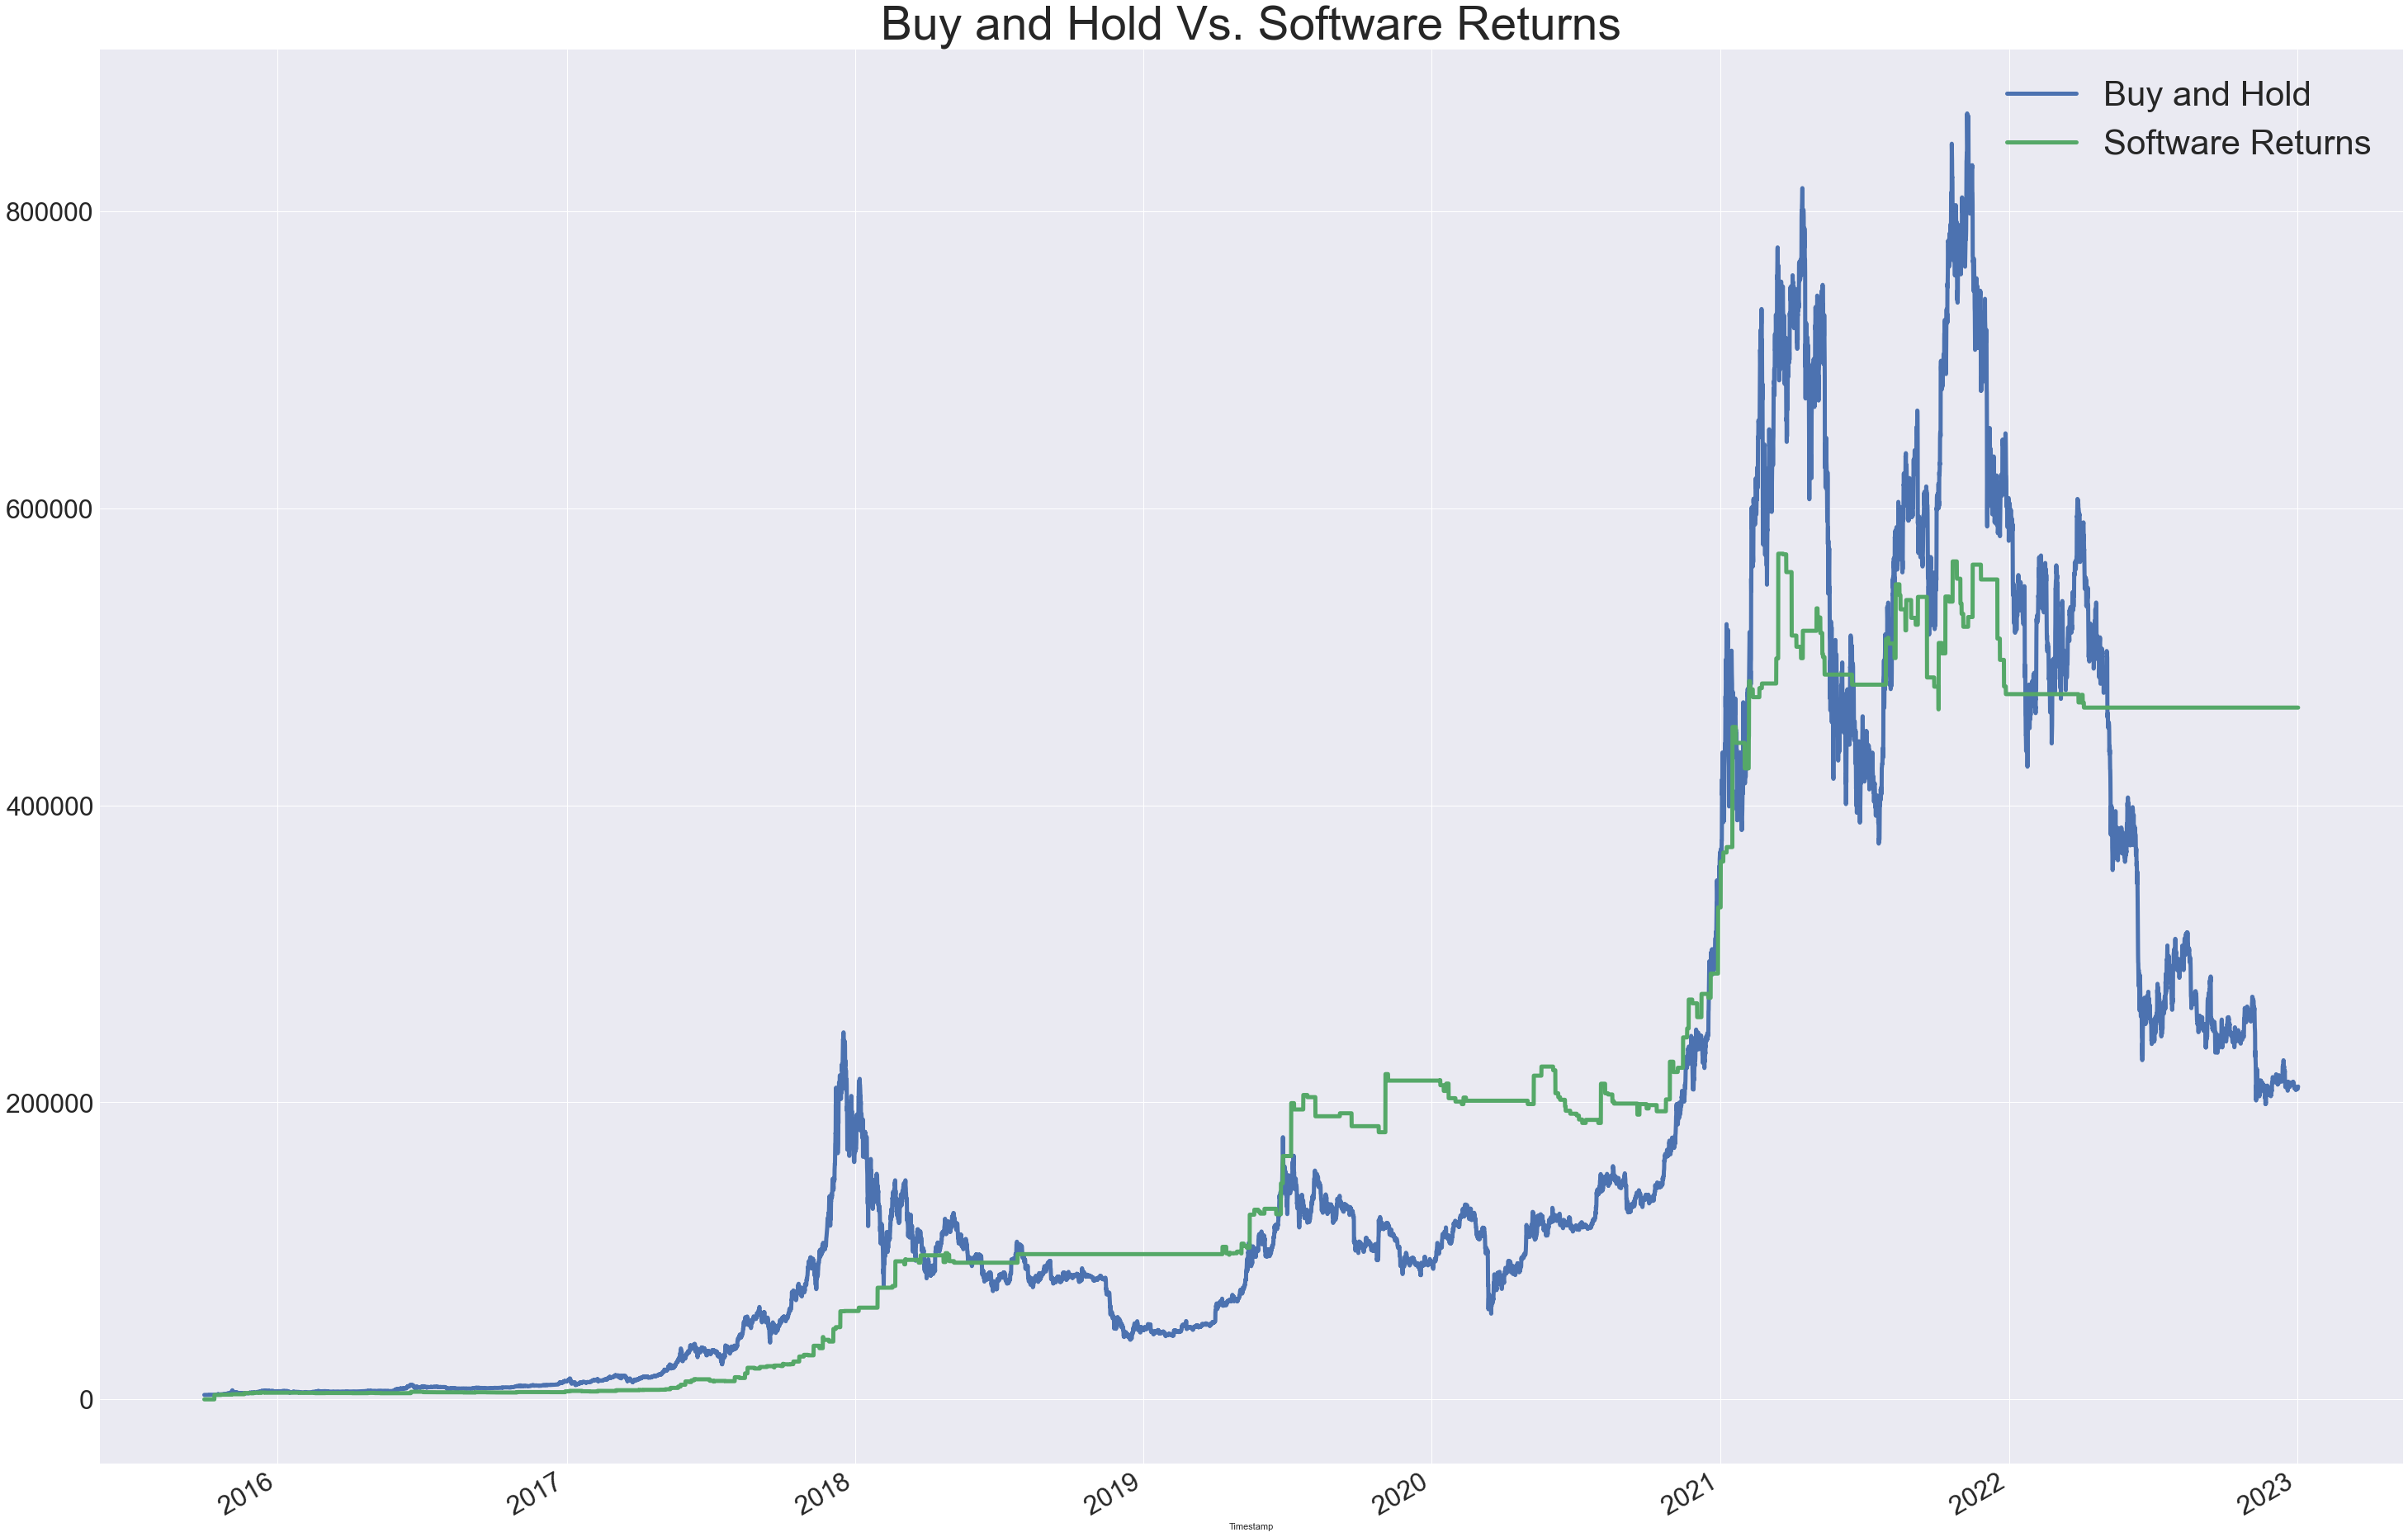

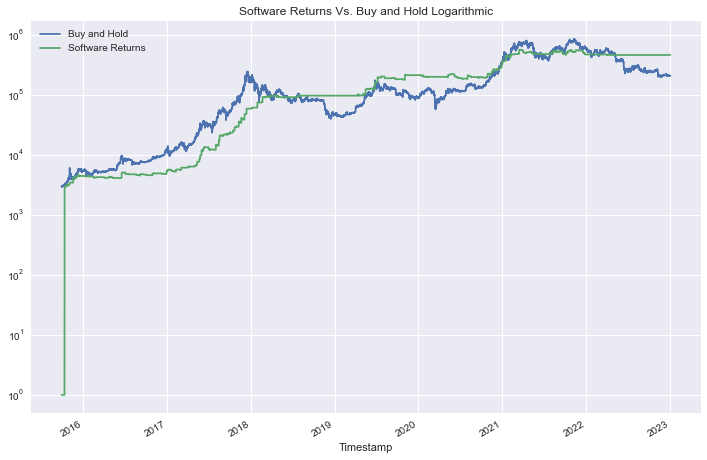

In [22]:
optimizer.plot_all()

In [23]:
optimizer.results_overview

,index,stop_loss_range,take_profit_range,performance,drawdown
0,1,1,2,-32.066926,0.358853
1,2,1,3,-5.119850,0.241686
2,3,1,4,45.756287,0.210710
3,4,1,5,102.352809,0.219340
4,5,1,6,158.397069,0.206079
...,...,...,...,...,...
1494,1495,30,46,10563.587767,0.193206
1495,1496,30,47,10636.626039,0.193206
1496,1497,30,48,10709.664311,0.193206
1497,1498,30,49,8379.980420,0.193206


In [24]:
pd.set_option('display.max_rows', None)

In [25]:
optimizer.results_overview.sort_values(by=["performance"], axis=0, ascending = False)

,index,stop_loss_range,take_profit_range,performance,drawdown
1320,1321,27,22,15214.033111,0.193206
920,921,19,22,15214.033111,0.193206
970,971,20,22,15214.033111,0.193206
1070,1071,22,22,15214.033111,0.193206
1420,1421,29,22,15214.033111,0.193206
1470,1471,30,22,15214.033111,0.193206
870,871,18,22,15214.033111,0.193206
1270,1271,26,22,15214.033111,0.193206
1120,1121,23,22,15214.033111,0.193206
1370,1371,28,22,15214.033111,0.193206


In [26]:
optimizer.current_balance

459420.99333810265